# Advanced NN

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings(action='ignore')

data_dir = '/content/drive/MyDrive/Tobigs/Week7_NN심화_lsb-20210902T045600Z-001/Week7_NN심화_lsb/Week7_NN심화_Assignment/'

# 데이터 확인

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

데이터 출처: https://github.com/zalandoresearch/fashion-mnist

In [2]:
data_dir = './Week7_NN심화_lsb-20210902T045600Z-001/Week7_NN심화_lsb/Week7_NN심화_Assignment'

In [3]:
Train = pd.read_csv(data_dir + '/Train.csv')
Test = pd.read_csv(data_dir + '/Test.csv')
submission = pd.read_csv(data_dir + '/submission.csv')

In [4]:
Train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [5]:
Train['label'].nunique()

10

In [6]:
Test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,67,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,2,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,93,58,78,45,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,71,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,63,0,0,0,0,0,0,0


In [7]:
submission.head()

,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [137]:
X = Train.iloc[:, :-1].values
print(X.shape)
y = Train.iloc[:, -1].values

(59500, 784)


In [139]:
# Convert Channel
c_X = np.dstack([X] * 3)
c_X = c_X.reshape(-1, 28, 28, 3)
c_X.shape

(59500, 28, 28, 3)

In [140]:
import cv2
X_l = []
for image in c_X:
  img = image.astype('float32')
  img = cv2.resize(img, (32, 32))
  X_l.append(img.astype('int32'))
c_X = np.array(X_l)
c_X.shape

(59500, 32, 32, 3)

In [9]:
# original channel
X = Train.iloc[:, :-1].values
X = X.reshape(-1, 28, 28, 1)
y = Train.iloc[:, -1].values

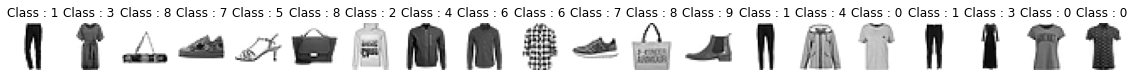

In [142]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X[idx].reshape(28,28),cmap='gray_r')
  plt.title(f'Class : {y[idx]}')

In [141]:
X_test = Test.values
X_test.shape

(10500, 784)

In [145]:
# convert Channel
c_X_test = np.dstack([X_test] * 3)
c_X_test = c_X_test.reshape(-1, 28, 28, 3)
c_X_test.shape

(10500, 28, 28, 3)

In [14]:
X_test = Test.values
X_test = X_test.reshape(-1, 28, 28, 1)

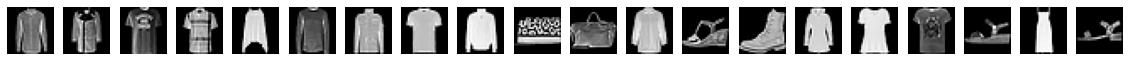

In [19]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X_test[idx])

# 데이터 분리

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 16, stratify = y, shuffle = True)

# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [16]:
print('X_train: {}\nX_val: {}\nX_test: {}'.format(len(X_train),len(X_val),len(X_test)) )

X_train: 47600
X_val: 11900
X_test: 10500


In [146]:
from sklearn.model_selection import train_test_split

CX_train, CX_val, Cy_train, Cy_val = train_test_split(c_X, y, test_size = 0.2, random_state = 16, stratify = y, shuffle = True)

# 정규화
CX_train = CX_train / 255.0
CX_val = CX_val / 255.0
CX_test = c_X_test / 255.0

# Data Augmentation

## Horizontal & Vertical Flipping


In [18]:
def flip_up_down(img):
    newImg = img.copy()
    return cv2.flip(newImg, 0)

def flip_right_left(img):
    newImg = img.copy()
    return cv2.flip(newImg, 1)

In [147]:
import cv2
from tqdm import tqdm
import random

gen_img = []
gen_label = []

for img, label in tqdm(zip(X_train, y_train)):
#     vf_img = flip_up_down(img)    
    hf_img = flip_right_left(img)
#     r_img = rotation(img, 10)

#     gen_img.append(vf_img)
    gen_img.append(hf_img)
#     gen_img.append(r_img)
#     gen_label.append(label)
    gen_label.append(label)
#     gen_label.append(label)

47600it [00:00, 81269.91it/s]


In [148]:
print(len(gen_img))
print(len(gen_label))

47600
47600


In [149]:
gen_img = np.array(gen_img).reshape(-1, 28, 28, 1)
gen_img.dtype

dtype('float64')

In [150]:
aug_X_train = gen_img.tolist() + X_train.tolist()
aug_y_train = gen_label + y_train.tolist()

In [151]:
aug_X_train = np.array(aug_X_train, dtype = 'float64')
aug_y_train = np.array(aug_y_train)

print(len(aug_X_train), len(aug_y_train), len(X_val), len(y_val))

95200 95200 11900 11900


In [152]:
# aug_X_train = aug_X_train.reshape(-1, 28, 28, 1)
aug_X_train.shape

(95200, 28, 28, 1)

In [153]:
aug_X_train.dtype

dtype('float64')

## Rotation

In [19]:
def rotation(img, angle):
    angle = int(random.uniform(-angle, angle))
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))

    return img

In [54]:
import random
rotated_img = []
rotated_label = []

for img, label in tqdm(zip(X_train, y_train)):
    r_img = rotation(img, 10)
    
    rotated_img.append(r_img)
    rotated_label.append(y_train)

47600it [00:01, 26738.31it/s]


In [56]:
print(len(rotated_img))
print(len(rotated_label))

47600
47600


In [76]:
aug2_X_train = list(X_train) + gen_img + rotated_img
aug2_y_train = list(y_train) + gen_label + rotated_label

aug2_X_train = np.array(aug2_X_train)
aug2_y_train = np.array(aug2_y_train)

print(len(aug2_X_train), len(aug2_y_train))

190400 190400


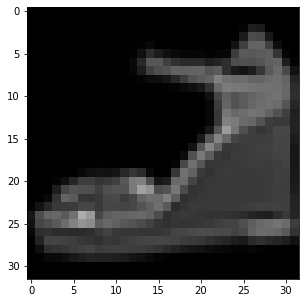

In [77]:
plt.figure(figsize=(5,5))
plt.imshow(rotated_img[50])

# Model

## Transfer Learning

In [155]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization, Input, Lambda, GlobalAveragePooling2D
from tensorflow.keras.models import Model

input_image = Input(shape=(32,32,3))

base_model = MobileNet(input_tensor=input_image,
                         include_top=False,
                         weights='imagenet')
x = Dropout(0.5)(base_model.output)
x = GlobalAveragePooling2D()(x)
pred = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=pred)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)       

### Train Original Data

In [49]:
optimizer = keras.optimizers.Adam(lr=0.01, decay = 0.001)
model2.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [164]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [165]:
BATCH_SIZE = 128
EPOCHS = 100

callbacks = [
    ModelCheckpoint('aug_mobilenet.h5', verbose=1, save_best_only=True,monitor='val_accuracy'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4)
#     EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=False)
]

result = model.fit(CX_train, Cy_train,
                   batch_size=BATCH_SIZE, 
                  # steps_per_epoch=train_steps,
                  # validation_steps=valid_steps,
                   epochs=EPOCHS,
                   validation_data=(CX_val, Cy_val),
                   callbacks=callbacks)

Epoch 1/100
372/372 [==============================] - ETA: 0s - loss: 1.6778 - accuracy: 0.7828
Epoch 00001: val_accuracy improved from -inf to 0.78849, saving model to aug_mobilenet.h5
372/372 [==============================] - 11s 31ms/step - loss: 1.6778 - accuracy: 0.7828 - val_loss: 1.6724 - val_accuracy: 0.7885
Epoch 2/100
372/372 [==============================] - ETA: 0s - loss: 1.6468 - accuracy: 0.8140
Epoch 00002: val_accuracy did not improve from 0.78849
372/372 [==============================] - 9s 25ms/step - loss: 1.6468 - accuracy: 0.8140 - val_loss: 1.6906 - val_accuracy: 0.7702
Epoch 3/100
371/372 [============================>.] - ETA: 0s - loss: 1.6470 - accuracy: 0.8140
Epoch 00003: val_accuracy improved from 0.78849 to 0.79655, saving model to aug_mobilenet.h5
372/372 [==============================] - 10s 26ms/step - loss: 1.6469 - accuracy: 0.8140 - val_loss: 1.6643 - val_accuracy: 0.7966
Epoch 4/100
372/372 [==============================] - ETA: 0s - loss: 1.

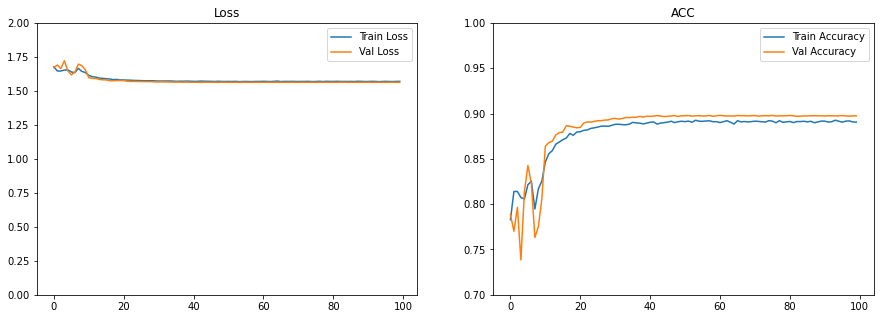

In [167]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 2)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

### Train Augmented Data

In [71]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [73]:
callbacks = [
    ModelCheckpoint('aug_mobilenet.h5', verbose=1, save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False)
]

hist3 = model2.fit(aug_X_train, aug_y_train, batch_size=BATCH_SIZE, 
                  # steps_per_epoch=train_steps,
                  # validation_steps=valid_steps,
                  epochs=100,
                  validation_data=(X_val, y_val),
                  callbacks=callbacks)

Epoch 1/100
4462/4463 [============================>.] - ETA: 0s - loss: 3.4256 - accuracy: 0.5651
Epoch 00001: val_loss improved from inf to 0.95824, saving model to aug_mobilenet.h5
4463/4463 [==============================] - 55s 12ms/step - loss: 3.4260 - accuracy: 0.5651 - val_loss: 0.9582 - val_accuracy: 0.7330
Epoch 2/100
4462/4463 [============================>.] - ETA: 0s - loss: 1.2366 - accuracy: 0.6651
Epoch 00002: val_loss improved from 0.95824 to 0.73437, saving model to aug_mobilenet.h5
4463/4463 [==============================] - 55s 12ms/step - loss: 1.2365 - accuracy: 0.6651 - val_loss: 0.7344 - val_accuracy: 0.7388
Epoch 3/100
4462/4463 [============================>.] - ETA: 0s - loss: 0.9589 - accuracy: 0.7124
Epoch 00003: val_loss improved from 0.73437 to 0.59806, saving model to aug_mobilenet.h5
4463/4463 [==============================] - 55s 12ms/step - loss: 0.9589 - accuracy: 0.7124 - val_loss: 0.5981 - val_accuracy: 0.7701
Epoch 4/100
4460/4463 [============

KeyboardInterrupt: 

## Sequential Model

In [168]:
BATCH_SIZE = 128
EPOCHS = 100

In [207]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_36 (Batc (None, 512)               2048      
_________________________________________________________________
activation_36 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_37 (Batc (None, 256)             

### Train Augmented Data

* Vertical Flip + Horizontal Flip

In [87]:
optimizer = keras.optimizers.Adam(lr=0.01, decay = 0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [88]:
result = model.fit(aug_X_train, aug_y_train, epochs=EPOCHS, validation_data = (X_val, y_val), batch_size=BATCH_SIZE)

Epoch 1/100
744/744 [==============================] - 3s 4ms/step - loss: 1.6359 - accuracy: 0.8248 - val_loss: 1.6284 - val_accuracy: 0.8316
Epoch 2/100
744/744 [==============================] - 3s 4ms/step - loss: 1.6105 - accuracy: 0.8501 - val_loss: 1.5977 - val_accuracy: 0.8630
Epoch 3/100
744/744 [==============================] - 3s 4ms/step - loss: 1.5987 - accuracy: 0.8620 - val_loss: 1.5920 - val_accuracy: 0.8676
Epoch 4/100
744/744 [==============================] - 3s 4ms/step - loss: 1.5922 - accuracy: 0.8685 - val_loss: 1.5879 - val_accuracy: 0.8726
Epoch 5/100
744/744 [==============================] - 3s 4ms/step - loss: 1.5836 - accuracy: 0.8773 - val_loss: 1.5786 - val_accuracy: 0.8820
Epoch 6/100
744/744 [==============================] - 3s 4ms/step - loss: 1.5803 - accuracy: 0.8804 - val_loss: 1.5735 - val_accuracy: 0.8871
Epoch 7/100
744/744 [==============================] - 3s 4ms/step - loss: 1.5760 - accuracy: 0.8848 - val_loss: 1.5805 - val_accuracy: 0.8801

* Horizontal Flip

In [191]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [192]:
callbacks = [
    ModelCheckpoint('aug_model.h5', verbose=1, save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4)
#     EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False)
]

hist = model.fit(aug_X_train, aug_y_train, epochs=EPOCHS, validation_data = (X_val, y_val), batch_size=BATCH_SIZE, callbacks=callbacks)

Epoch 1/100
741/744 [============================>.] - ETA: 0s - loss: 0.5173 - accuracy: 0.8130
Epoch 00001: val_loss improved from inf to 0.38282, saving model to aug_model.h5
744/744 [==============================] - 3s 4ms/step - loss: 0.5167 - accuracy: 0.8133 - val_loss: 0.3828 - val_accuracy: 0.8601
Epoch 2/100
736/744 [============================>.] - ETA: 0s - loss: 0.3839 - accuracy: 0.8588
Epoch 00002: val_loss improved from 0.38282 to 0.33218, saving model to aug_model.h5
744/744 [==============================] - 3s 4ms/step - loss: 0.3839 - accuracy: 0.8589 - val_loss: 0.3322 - val_accuracy: 0.8733
Epoch 3/100
744/744 [==============================] - ETA: 0s - loss: 0.3448 - accuracy: 0.8726
Epoch 00003: val_loss did not improve from 0.33218
744/744 [==============================] - 3s 4ms/step - loss: 0.3448 - accuracy: 0.8726 - val_loss: 0.3651 - val_accuracy: 0.8659
Epoch 4/100
742/744 [============================>.] - ETA: 0s - loss: 0.3189 - accuracy: 0.8818
Ep

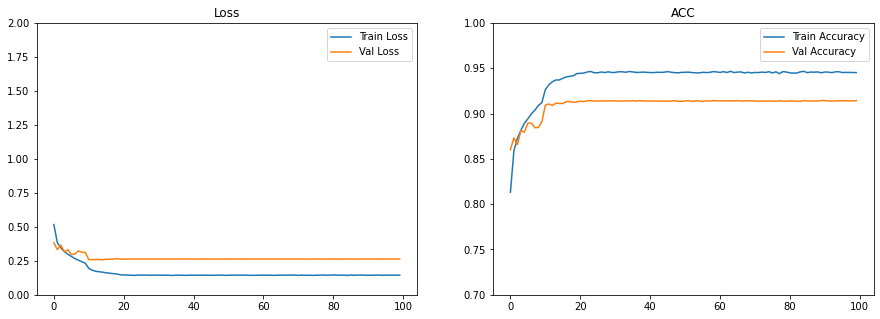

In [193]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(hist.epoch, hist.history["loss"], label='Train Loss')
axes[0].plot(hist.epoch, hist.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 2)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(hist.epoch, hist.history['accuracy'], label='Train Accuracy')
axes[1].plot(hist.epoch, hist.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

## Train Original Data
* optimizer = keras.optimizers.Adam(lr=0.01, decay = 0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [199]:
optimizer = keras.optimizers.Adam(lr=0.01, decay = 0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [200]:
result = model.fit(X_train, y_train, epochs=EPOCHS, validation_data = (X_val, y_val), batch_size=BATCH_SIZE)

Epoch 1/100
372/372 [==============================] - 2s 4ms/step - loss: 1.6943 - accuracy: 0.7677 - val_loss: 1.6863 - val_accuracy: 0.7741
Epoch 2/100
372/372 [==============================] - 1s 4ms/step - loss: 1.6640 - accuracy: 0.7965 - val_loss: 1.6766 - val_accuracy: 0.7830
Epoch 3/100
372/372 [==============================] - 1s 4ms/step - loss: 1.6324 - accuracy: 0.8281 - val_loss: 1.6208 - val_accuracy: 0.8399
Epoch 4/100
372/372 [==============================] - 2s 4ms/step - loss: 1.6161 - accuracy: 0.8453 - val_loss: 1.6128 - val_accuracy: 0.8479
Epoch 5/100
372/372 [==============================] - 1s 4ms/step - loss: 1.6073 - accuracy: 0.8537 - val_loss: 1.6046 - val_accuracy: 0.8562
Epoch 6/100
372/372 [==============================] - 1s 4ms/step - loss: 1.6010 - accuracy: 0.8594 - val_loss: 1.5951 - val_accuracy: 0.8663
Epoch 7/100
372/372 [==============================] - 1s 4ms/step - loss: 1.5952 - accuracy: 0.8654 - val_loss: 1.5896 - val_accuracy: 0.8711

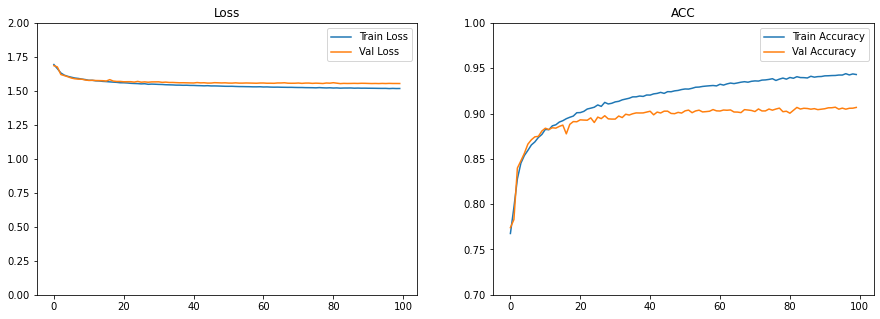

In [201]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 2)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

* optimizer='adam', Loss = 'sparse_categorical_crossentropy'

In [208]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [210]:
# train_steps = len(X_train)//BATCH_SIZE
# valid_steps = len(X_val)//BATCH_SIZE

# if len(X_train) % BATCH_SIZE != 0:
#     train_steps += 1
# if len(X_val) % BATCH_SIZE != 0:
#     valid_steps += 1
    
# callbacks = [
#             ModelCheckpoint('adam_model.h5', verbose=1, save_best_only=True),
#             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4),
# #             EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False)
#             ]

hist = model.fit(X_train, y_train, batch_size=BATCH_SIZE, 
#                   steps_per_epoch=train_steps,
#                   validation_steps=valid_steps,
                  epochs=EPOCHS, 
                  validation_data=(X_val, y_val))
#                  callbacks=callbacks)

Epoch 1/100
372/372 [==============================] - 1s 4ms/step - loss: 0.2379 - accuracy: 0.9112 - val_loss: 0.3384 - val_accuracy: 0.8758
Epoch 2/100
372/372 [==============================] - 1s 4ms/step - loss: 0.2249 - accuracy: 0.9142 - val_loss: 0.3107 - val_accuracy: 0.8886
Epoch 3/100
372/372 [==============================] - 1s 4ms/step - loss: 0.2177 - accuracy: 0.9175 - val_loss: 0.3352 - val_accuracy: 0.8762
Epoch 4/100
372/372 [==============================] - 1s 4ms/step - loss: 0.2098 - accuracy: 0.9216 - val_loss: 0.3312 - val_accuracy: 0.8876
Epoch 5/100
372/372 [==============================] - 1s 4ms/step - loss: 0.2034 - accuracy: 0.9227 - val_loss: 0.3316 - val_accuracy: 0.8864
Epoch 6/100
372/372 [==============================] - 1s 4ms/step - loss: 0.1972 - accuracy: 0.9253 - val_loss: 0.3152 - val_accuracy: 0.8939
Epoch 7/100
372/372 [==============================] - 1s 4ms/step - loss: 0.1897 - accuracy: 0.9294 - val_loss: 0.3105 - val_accuracy: 0.8944

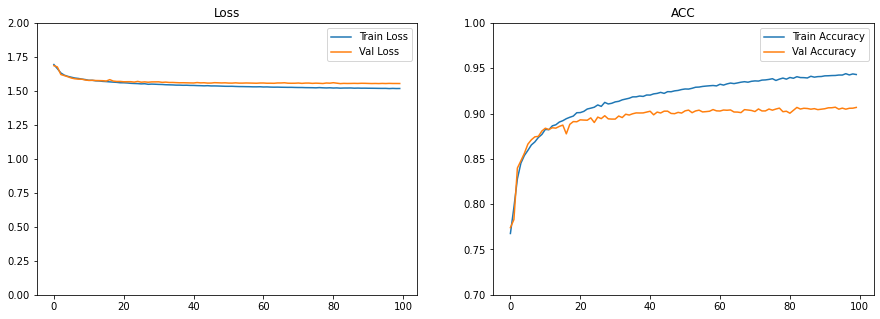

In [212]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 2)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

* optimizer=tf.keras.optimizers.Nadam(), loss='sparse_categorical_crossentropy'

In [118]:
model.compile(optimizer=tf.keras.optimizers.Nadam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [121]:
callbacks = [
    ModelCheckpoint('best_model4.h5', verbose=1, save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4),
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=False)
]

hist = model.fit(X_train, y_train, batch_size=BATCH_SIZE, 
                  # steps_per_epoch=train_steps,
                  # validation_steps=valid_steps,
                  epochs=100,
                  validation_data=(X_val, y_val),
                  callbacks=callbacks)

Epoch 1/100
363/372 [============================>.] - ETA: 0s - loss: 0.1332 - accuracy: 0.9513
Epoch 00001: val_loss improved from inf to 0.26494, saving model to best_model4.h5
372/372 [==============================] - 2s 5ms/step - loss: 0.1337 - accuracy: 0.9511 - val_loss: 0.2649 - val_accuracy: 0.9124
Epoch 2/100
361/372 [============================>.] - ETA: 0s - loss: 0.1343 - accuracy: 0.9497
Epoch 00002: val_loss did not improve from 0.26494
372/372 [==============================] - 2s 5ms/step - loss: 0.1340 - accuracy: 0.9499 - val_loss: 0.2652 - val_accuracy: 0.9120
Epoch 3/100
364/372 [============================>.] - ETA: 0s - loss: 0.1331 - accuracy: 0.9507
Epoch 00003: val_loss did not improve from 0.26494
372/372 [==============================] - 2s 5ms/step - loss: 0.1329 - accuracy: 0.9507 - val_loss: 0.2652 - val_accuracy: 0.9120
Epoch 4/100
365/372 [============================>.] - ETA: 0s - loss: 0.1353 - accuracy: 0.9501
Epoch 00004: val_loss did not impr

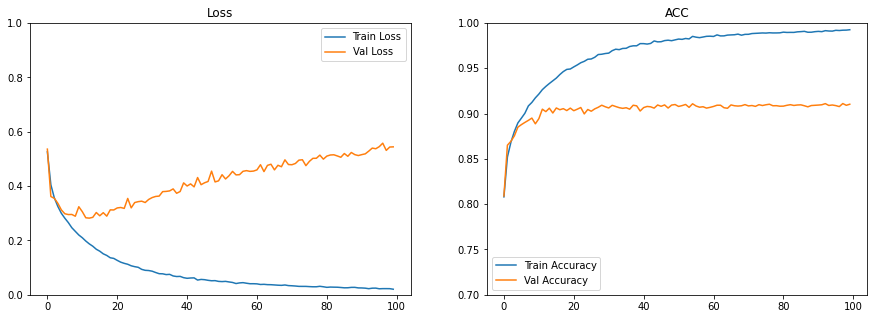

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# 제출

In [132]:
from tensorflow.keras.models import load_model
model = load_model('./best_model.h5')

In [196]:
pred_label = np.argmax(model.predict(X_test), axis = 1)

submission['label'] = pred_label

submission.to_csv(data_dir + 'BaseLine_Model.csv', index = False)

submission.head()

,id,label
0,0,6
1,1,0
2,2,0
3,3,0
4,4,6
